# Airline Delay Project

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Dataframe Creation

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 354_Final.csv to 354_Final.csv


In [3]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['354_Final.csv']))

## Data Cleanup & Manipulation

In [217]:
df

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,...,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,TMAX,AWND
0,1,1,1,11,36,168,Delta Air Lines Inc.,10278,73508,1680928,...,0.000144,0.000149,23,John F. Kennedy International,40.639,-73.777,NONE,0.0,35,10.96
1,1,1,0,11,30,168,Delta Air Lines Inc.,10278,73508,1680928,...,0.000144,0.000149,19,John F. Kennedy International,40.639,-73.777,NONE,0.0,35,10.96
2,1,1,0,10,22,168,Delta Air Lines Inc.,10278,73508,1680928,...,0.000144,0.000149,22,John F. Kennedy International,40.639,-73.777,NONE,0.0,35,10.96
3,1,1,0,10,30,168,Delta Air Lines Inc.,10278,73508,1680928,...,0.000144,0.000149,22,John F. Kennedy International,40.639,-73.777,NONE,0.0,35,10.96
4,1,1,0,11,23,246,Delta Air Lines Inc.,10278,73508,1680928,...,0.000144,0.000149,19,John F. Kennedy International,40.639,-73.777,NONE,0.0,35,10.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45416,1,1,0,11,3,169,United Air Lines Inc.,1191,46218,154082,...,0.000254,0.000229,24,Keahole,19.739,-156.046,Stapleton International,0.0,81,6.71
45417,1,1,0,11,3,173,United Air Lines Inc.,1191,46218,154082,...,0.000254,0.000229,7,Keahole,19.739,-156.046,San Francisco International,0.0,81,6.71
45418,1,1,0,10,3,173,United Air Lines Inc.,1191,46218,154082,...,0.000254,0.000229,5,Keahole,19.739,-156.046,Los Angeles International,0.0,81,6.71
45419,1,1,1,11,3,193,Delta Air Lines Inc.,1191,73508,154082,...,0.000144,0.000149,14,Keahole,19.739,-156.046,Seattle International,0.0,81,6.71


In [218]:
dfu = df.drop(['MONTH', 'DAY_OF_WEEK', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT'], axis = 1)
dfu

,DEP_DEL15,DISTANCE_GROUP,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,TMAX,AWND
0,1,11,36,168,Delta Air Lines Inc.,10278,73508,1680928,12460183,0.000144,0.000149,23,40.639,-73.777,0.0,35,10.96
1,0,11,30,168,Delta Air Lines Inc.,10278,73508,1680928,12460183,0.000144,0.000149,19,40.639,-73.777,0.0,35,10.96
2,0,10,22,168,Delta Air Lines Inc.,10278,73508,1680928,12460183,0.000144,0.000149,22,40.639,-73.777,0.0,35,10.96
3,0,10,30,168,Delta Air Lines Inc.,10278,73508,1680928,12460183,0.000144,0.000149,22,40.639,-73.777,0.0,35,10.96
4,0,11,23,246,Delta Air Lines Inc.,10278,73508,1680928,12460183,0.000144,0.000149,19,40.639,-73.777,0.0,35,10.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45416,0,11,3,169,United Air Lines Inc.,1191,46218,154082,8501631,0.000254,0.000229,24,19.739,-156.046,0.0,81,6.71
45417,0,11,3,173,United Air Lines Inc.,1191,46218,154082,8501631,0.000254,0.000229,7,19.739,-156.046,0.0,81,6.71
45418,0,10,3,173,United Air Lines Inc.,1191,46218,154082,8501631,0.000254,0.000229,5,19.739,-156.046,0.0,81,6.71
45419,1,11,3,193,Delta Air Lines Inc.,1191,73508,154082,12460183,0.000144,0.000149,14,19.739,-156.046,0.0,81,6.71


In [219]:
print(dfu.isnull().sum())

DEP_DEL15                   0
DISTANCE_GROUP              0
CONCURRENT_FLIGHTS          0
NUMBER_OF_SEATS             0
CARRIER_NAME                0
AIRPORT_FLIGHTS_MONTH       0
AIRLINE_FLIGHTS_MONTH       0
AVG_MONTHLY_PASS_AIRPORT    0
AVG_MONTHLY_PASS_AIRLINE    0
FLT_ATTENDANTS_PER_PASS     0
GROUND_SERV_PER_PASS        0
PLANE_AGE                   0
LATITUDE                    0
LONGITUDE                   0
PRCP                        0
TMAX                        0
AWND                        0
dtype: int64


In [220]:
dfu['CARRIER_NAME'] = dfu['CARRIER_NAME'].factorize()[0]
dfu

,DEP_DEL15,DISTANCE_GROUP,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,TMAX,AWND
0,1,11,36,168,0,10278,73508,1680928,12460183,0.000144,0.000149,23,40.639,-73.777,0.0,35,10.96
1,0,11,30,168,0,10278,73508,1680928,12460183,0.000144,0.000149,19,40.639,-73.777,0.0,35,10.96
2,0,10,22,168,0,10278,73508,1680928,12460183,0.000144,0.000149,22,40.639,-73.777,0.0,35,10.96
3,0,10,30,168,0,10278,73508,1680928,12460183,0.000144,0.000149,22,40.639,-73.777,0.0,35,10.96
4,0,11,23,246,0,10278,73508,1680928,12460183,0.000144,0.000149,19,40.639,-73.777,0.0,35,10.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45416,0,11,3,169,3,1191,46218,154082,8501631,0.000254,0.000229,24,19.739,-156.046,0.0,81,6.71
45417,0,11,3,173,3,1191,46218,154082,8501631,0.000254,0.000229,7,19.739,-156.046,0.0,81,6.71
45418,0,10,3,173,3,1191,46218,154082,8501631,0.000254,0.000229,5,19.739,-156.046,0.0,81,6.71
45419,1,11,3,193,0,1191,73508,154082,12460183,0.000144,0.000149,14,19.739,-156.046,0.0,81,6.71


In [221]:
print(dfu.isnull().sum())

DEP_DEL15                   0
DISTANCE_GROUP              0
CONCURRENT_FLIGHTS          0
NUMBER_OF_SEATS             0
CARRIER_NAME                0
AIRPORT_FLIGHTS_MONTH       0
AIRLINE_FLIGHTS_MONTH       0
AVG_MONTHLY_PASS_AIRPORT    0
AVG_MONTHLY_PASS_AIRLINE    0
FLT_ATTENDANTS_PER_PASS     0
GROUND_SERV_PER_PASS        0
PLANE_AGE                   0
LATITUDE                    0
LONGITUDE                   0
PRCP                        0
TMAX                        0
AWND                        0
dtype: int64


In [222]:
dfu['PLANE_AGE'] = dfu['PLANE_AGE'].fillna(0)
dfu['PLANE_AGE_GROUP'] = pd.cut(dfu['PLANE_AGE'], bins=[0, 10, 20, 32], labels=[0, 1, 2])

In [223]:
print(dfu.isnull().sum())

DEP_DEL15                   0
DISTANCE_GROUP              0
CONCURRENT_FLIGHTS          0
NUMBER_OF_SEATS             0
CARRIER_NAME                0
AIRPORT_FLIGHTS_MONTH       0
AIRLINE_FLIGHTS_MONTH       0
AVG_MONTHLY_PASS_AIRPORT    0
AVG_MONTHLY_PASS_AIRLINE    0
FLT_ATTENDANTS_PER_PASS     0
GROUND_SERV_PER_PASS        0
PLANE_AGE                   0
LATITUDE                    0
LONGITUDE                   0
PRCP                        0
TMAX                        0
AWND                        0
PLANE_AGE_GROUP             2
dtype: int64


In [224]:
dfu.PLANE_AGE_GROUP.dropna()

0        2
1        1
2        2
3        2
4        1
        ..
45416    2
45417    0
45418    0
45419    1
45420    1
Name: PLANE_AGE_GROUP, Length: 45419, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [225]:
print(dfu.isnull().sum())

DEP_DEL15                   0
DISTANCE_GROUP              0
CONCURRENT_FLIGHTS          0
NUMBER_OF_SEATS             0
CARRIER_NAME                0
AIRPORT_FLIGHTS_MONTH       0
AIRLINE_FLIGHTS_MONTH       0
AVG_MONTHLY_PASS_AIRPORT    0
AVG_MONTHLY_PASS_AIRLINE    0
FLT_ATTENDANTS_PER_PASS     0
GROUND_SERV_PER_PASS        0
PLANE_AGE                   0
LATITUDE                    0
LONGITUDE                   0
PRCP                        0
TMAX                        0
AWND                        0
PLANE_AGE_GROUP             2
dtype: int64


In [226]:
dfu.index[dfu['PLANE_AGE_GROUP'].isna()]

Int64Index([33501, 35076], dtype='int64')

In [227]:
dfu = dfu.drop([33501, 35076])

In [228]:
print(dfu.isnull().sum())

DEP_DEL15                   0
DISTANCE_GROUP              0
CONCURRENT_FLIGHTS          0
NUMBER_OF_SEATS             0
CARRIER_NAME                0
AIRPORT_FLIGHTS_MONTH       0
AIRLINE_FLIGHTS_MONTH       0
AVG_MONTHLY_PASS_AIRPORT    0
AVG_MONTHLY_PASS_AIRLINE    0
FLT_ATTENDANTS_PER_PASS     0
GROUND_SERV_PER_PASS        0
PLANE_AGE                   0
LATITUDE                    0
LONGITUDE                   0
PRCP                        0
TMAX                        0
AWND                        0
PLANE_AGE_GROUP             0
dtype: int64


In [229]:
dfu['PRCP'] = dfu['PRCP'].fillna(0)
dfu['PRCP'] = dfu['PRCP'].apply(lambda x: 1 if x > 0.0 else 0)

In [230]:
print(dfu.isnull().sum())

DEP_DEL15                   0
DISTANCE_GROUP              0
CONCURRENT_FLIGHTS          0
NUMBER_OF_SEATS             0
CARRIER_NAME                0
AIRPORT_FLIGHTS_MONTH       0
AIRLINE_FLIGHTS_MONTH       0
AVG_MONTHLY_PASS_AIRPORT    0
AVG_MONTHLY_PASS_AIRLINE    0
FLT_ATTENDANTS_PER_PASS     0
GROUND_SERV_PER_PASS        0
PLANE_AGE                   0
LATITUDE                    0
LONGITUDE                   0
PRCP                        0
TMAX                        0
AWND                        0
PLANE_AGE_GROUP             0
dtype: int64


In [231]:
dfu.drop('PLANE_AGE', axis = 1)

,DEP_DEL15,DISTANCE_GROUP,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,LATITUDE,LONGITUDE,PRCP,TMAX,AWND,PLANE_AGE_GROUP
0,1,11,36,168,0,10278,73508,1680928,12460183,0.000144,0.000149,40.639,-73.777,0,35,10.96,2
1,0,11,30,168,0,10278,73508,1680928,12460183,0.000144,0.000149,40.639,-73.777,0,35,10.96,1
2,0,10,22,168,0,10278,73508,1680928,12460183,0.000144,0.000149,40.639,-73.777,0,35,10.96,2
3,0,10,30,168,0,10278,73508,1680928,12460183,0.000144,0.000149,40.639,-73.777,0,35,10.96,2
4,0,11,23,246,0,10278,73508,1680928,12460183,0.000144,0.000149,40.639,-73.777,0,35,10.96,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45416,0,11,3,169,3,1191,46218,154082,8501631,0.000254,0.000229,19.739,-156.046,0,81,6.71,2
45417,0,11,3,173,3,1191,46218,154082,8501631,0.000254,0.000229,19.739,-156.046,0,81,6.71,0
45418,0,10,3,173,3,1191,46218,154082,8501631,0.000254,0.000229,19.739,-156.046,0,81,6.71,0
45419,1,11,3,193,0,1191,73508,154082,12460183,0.000144,0.000149,19.739,-156.046,0,81,6.71,1


In [232]:
print(dfu.isnull().sum())

DEP_DEL15                   0
DISTANCE_GROUP              0
CONCURRENT_FLIGHTS          0
NUMBER_OF_SEATS             0
CARRIER_NAME                0
AIRPORT_FLIGHTS_MONTH       0
AIRLINE_FLIGHTS_MONTH       0
AVG_MONTHLY_PASS_AIRPORT    0
AVG_MONTHLY_PASS_AIRLINE    0
FLT_ATTENDANTS_PER_PASS     0
GROUND_SERV_PER_PASS        0
PLANE_AGE                   0
LATITUDE                    0
LONGITUDE                   0
PRCP                        0
TMAX                        0
AWND                        0
PLANE_AGE_GROUP             0
dtype: int64


## Looking At Plane Age Group and All Other Features

In [412]:
dfutest = dfu.drop(['DISTANCE_GROUP', 'AVG_MONTHLY_PASS_AIRPORT',
                    'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
                    'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'LATITUDE', 'LONGITUDE'], axis = 1)
dfutest

,DEP_DEL15,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,PRCP,TMAX,AWND,PLANE_AGE_GROUP
0,1,36,168,0,10278,73508,0,35,10.96,2
1,0,30,168,0,10278,73508,0,35,10.96,1
2,0,22,168,0,10278,73508,0,35,10.96,2
3,0,30,168,0,10278,73508,0,35,10.96,2
4,0,23,246,0,10278,73508,0,35,10.96,1
...,...,...,...,...,...,...,...,...,...,...
45416,0,3,169,3,1191,46218,0,81,6.71,2
45417,0,3,173,3,1191,46218,0,81,6.71,0
45418,0,3,173,3,1191,46218,0,81,6.71,0
45419,1,3,193,0,1191,73508,0,81,6.71,1


In [413]:
df_X = dfutest.drop('PLANE_AGE_GROUP', axis = 1)

In [414]:
df_X

,DEP_DEL15,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,PRCP,TMAX,AWND
0,1,36,168,0,10278,73508,0,35,10.96
1,0,30,168,0,10278,73508,0,35,10.96
2,0,22,168,0,10278,73508,0,35,10.96
3,0,30,168,0,10278,73508,0,35,10.96
4,0,23,246,0,10278,73508,0,35,10.96
...,...,...,...,...,...,...,...,...,...
45416,0,3,169,3,1191,46218,0,81,6.71
45417,0,3,173,3,1191,46218,0,81,6.71
45418,0,3,173,3,1191,46218,0,81,6.71
45419,1,3,193,0,1191,73508,0,81,6.71


In [415]:
df_y = dfutest.PLANE_AGE_GROUP

In [416]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.25, random_state = 0)

### Creating the Logistic Regression Model Evalaution via Confusion Matrix Method

In [417]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [418]:
lor = LogisticRegression(max_iter = 10000)
lor.fit(X_train, y_train)
y_pred = lor.predict(X_test)

### Confusion matrix with all other features

In [419]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2802, 1596,    0],
       [1157, 4540,    0],
       [ 604,  656,    0]])

### Confusion Matrix Visualization

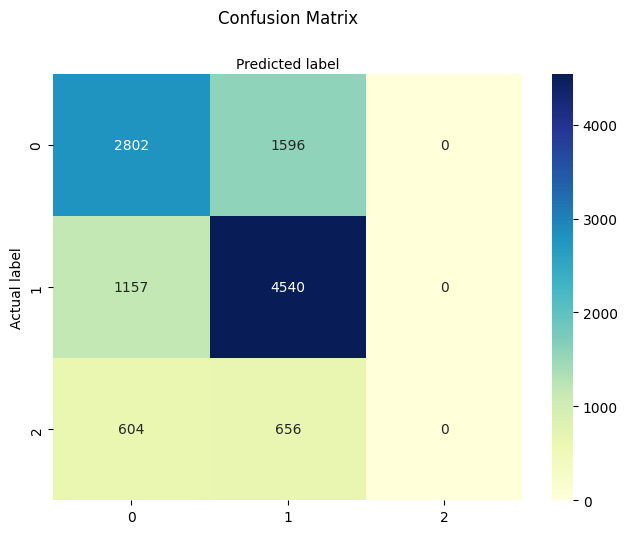

In [420]:
class_names = ['New', 'Standard', 'Old']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(ticks = tick_marks, labels = class_names)
plt.yticks(ticks = tick_marks, labels = class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('confusion_matrix_all.png', dpi = 100, bbox_inches='tight');

### Classification Report

In [421]:
target_names = ['New', 'Standard', 'Old']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         New       0.61      0.64      0.63      4398
    Standard       0.67      0.80      0.73      5697
         Old       0.00      0.00      0.00      1260

    accuracy                           0.65     11355
   macro avg       0.43      0.48      0.45     11355
weighted avg       0.57      0.65      0.61     11355



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Looking at Different Plane Ages in Precipitation

### No Precipitation

In [422]:
dfu10 = dfutest[dfutest['PRCP'] == 0]

In [423]:
dfu10

,DEP_DEL15,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,PRCP,TMAX,AWND,PLANE_AGE_GROUP
0,1,36,168,0,10278,73508,0,35,10.96,2
1,0,30,168,0,10278,73508,0,35,10.96,1
2,0,22,168,0,10278,73508,0,35,10.96,2
3,0,30,168,0,10278,73508,0,35,10.96,2
4,0,23,246,0,10278,73508,0,35,10.96,1
...,...,...,...,...,...,...,...,...,...,...
45416,0,3,169,3,1191,46218,0,81,6.71,2
45417,0,3,173,3,1191,46218,0,81,6.71,0
45418,0,3,173,3,1191,46218,0,81,6.71,0
45419,1,3,193,0,1191,73508,0,81,6.71,1


In [424]:
df_X = dfu10.drop('PLANE_AGE_GROUP', axis = 1)

In [425]:
df_X

,DEP_DEL15,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,PRCP,TMAX,AWND
0,1,36,168,0,10278,73508,0,35,10.96
1,0,30,168,0,10278,73508,0,35,10.96
2,0,22,168,0,10278,73508,0,35,10.96
3,0,30,168,0,10278,73508,0,35,10.96
4,0,23,246,0,10278,73508,0,35,10.96
...,...,...,...,...,...,...,...,...,...
45416,0,3,169,3,1191,46218,0,81,6.71
45417,0,3,173,3,1191,46218,0,81,6.71
45418,0,3,173,3,1191,46218,0,81,6.71
45419,1,3,193,0,1191,73508,0,81,6.71


In [426]:
df_y = dfu10.PLANE_AGE_GROUP

In [427]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.25, random_state = 0)

#### Logistic Regression Model Evalaution via Confusion Matrix Method

In [428]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [429]:
lor = LogisticRegression(max_iter = 10000)
lor.fit(X_train, y_train)
y_pred = lor.predict(X_test)

#### Confusion matrix

In [430]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2338, 1107,    0],
       [ 982, 3645,    0],
       [ 573,  557,    0]])

#### Confusion Matrix Visualization

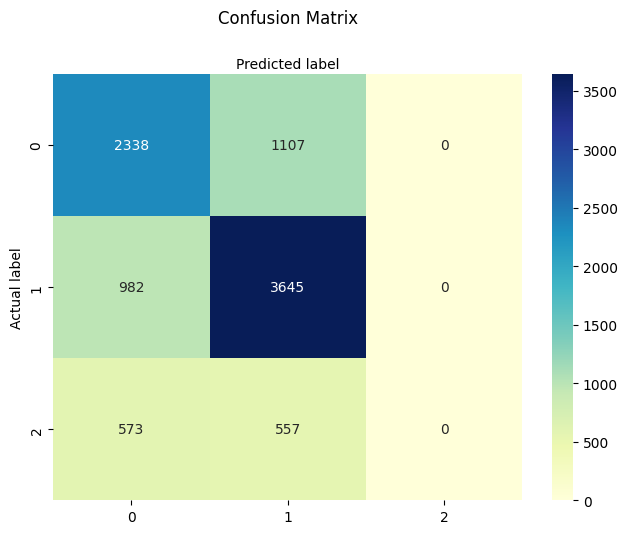

In [431]:
class_names = ['New', 'Standard', 'Old']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(ticks = tick_marks, labels = class_names)
plt.yticks(ticks = tick_marks, labels = class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('confusion_matrix_np.png', dpi = 100, bbox_inches='tight');

#### Classification Report

In [432]:
target_names = ['New', 'Standard', 'Old']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         New       0.60      0.68      0.64      3445
    Standard       0.69      0.79      0.73      4627
         Old       0.00      0.00      0.00      1130

    accuracy                           0.65      9202
   macro avg       0.43      0.49      0.46      9202
weighted avg       0.57      0.65      0.61      9202



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Precipitation

In [433]:
dfu11 = dfutest[dfutest['PRCP'] == 1]

In [434]:
dfu11

,DEP_DEL15,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,PRCP,TMAX,AWND,PLANE_AGE_GROUP
1838,0,21,160,0,7380,73508,1,62,6.71,1
1839,0,21,160,0,7380,73508,1,62,6.71,0
1840,0,22,110,0,7380,73508,1,62,6.71,1
1841,0,22,169,3,7380,46218,1,62,6.71,2
1842,0,22,154,3,7380,46218,1,62,6.71,1
...,...,...,...,...,...,...,...,...,...,...
45386,0,4,173,3,1191,46218,1,81,5.82,0
45387,0,3,169,3,1191,46218,1,81,5.82,2
45388,1,3,199,0,1191,73508,1,81,5.82,2
45389,0,3,173,3,1191,46218,1,81,5.82,0


In [435]:
df_X = dfu11.drop('PLANE_AGE_GROUP', axis = 1)

In [436]:
df_X

,DEP_DEL15,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,PRCP,TMAX,AWND
1838,0,21,160,0,7380,73508,1,62,6.71
1839,0,21,160,0,7380,73508,1,62,6.71
1840,0,22,110,0,7380,73508,1,62,6.71
1841,0,22,169,3,7380,46218,1,62,6.71
1842,0,22,154,3,7380,46218,1,62,6.71
...,...,...,...,...,...,...,...,...,...
45386,0,4,173,3,1191,46218,1,81,5.82
45387,0,3,169,3,1191,46218,1,81,5.82
45388,1,3,199,0,1191,73508,1,81,5.82
45389,0,3,173,3,1191,46218,1,81,5.82


In [437]:
df_y = dfu11.PLANE_AGE_GROUP

In [438]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.25, random_state = 0)

#### Logistic Regression Model Evalaution via Confusion Matrix Method

In [439]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [440]:
lor = LogisticRegression(max_iter = 10000)
lor.fit(X_train, y_train)
y_pred = lor.predict(X_test)

#### Confusion matrix

In [441]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[426, 434,   2],
       [220, 868,   0],
       [100, 101,   3]])

#### Confusion Matrix Visualization

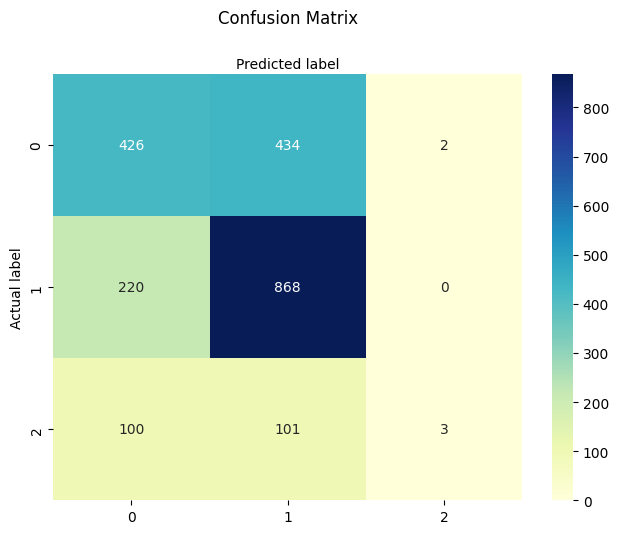

In [442]:
class_names = ['New', 'Standard', 'Old']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(ticks = tick_marks, labels = class_names)
plt.yticks(ticks = tick_marks, labels = class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('confusion_matrix_p.png', dpi = 100, bbox_inches='tight');

#### Classification Report

In [443]:
target_names = ['New', 'Standard', 'Old']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         New       0.57      0.49      0.53       862
    Standard       0.62      0.80      0.70      1088
         Old       0.60      0.01      0.03       204

    accuracy                           0.60      2154
   macro avg       0.60      0.44      0.42      2154
weighted avg       0.60      0.60      0.57      2154



## Looking at Different Plane Ages with No Delay or Delay

### No Delay

In [444]:
dfu12 = dfutest[dfutest['DEP_DEL15'] == 0]

In [445]:
dfu12

,DEP_DEL15,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,PRCP,TMAX,AWND,PLANE_AGE_GROUP
1,0,30,168,0,10278,73508,0,35,10.96,1
2,0,22,168,0,10278,73508,0,35,10.96,2
3,0,30,168,0,10278,73508,0,35,10.96,2
4,0,23,246,0,10278,73508,0,35,10.96,1
5,0,32,160,0,10278,73508,0,35,10.96,1
...,...,...,...,...,...,...,...,...,...,...
45414,0,3,181,1,1191,75506,0,81,6.71,0
45416,0,3,169,3,1191,46218,0,81,6.71,2
45417,0,3,173,3,1191,46218,0,81,6.71,0
45418,0,3,173,3,1191,46218,0,81,6.71,0


In [446]:
df_X = dfu12.drop('PLANE_AGE_GROUP', axis = 1)

In [447]:
df_X

,DEP_DEL15,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,PRCP,TMAX,AWND
1,0,30,168,0,10278,73508,0,35,10.96
2,0,22,168,0,10278,73508,0,35,10.96
3,0,30,168,0,10278,73508,0,35,10.96
4,0,23,246,0,10278,73508,0,35,10.96
5,0,32,160,0,10278,73508,0,35,10.96
...,...,...,...,...,...,...,...,...,...
45414,0,3,181,1,1191,75506,0,81,6.71
45416,0,3,169,3,1191,46218,0,81,6.71
45417,0,3,173,3,1191,46218,0,81,6.71
45418,0,3,173,3,1191,46218,0,81,6.71


In [448]:
df_y = dfu12.PLANE_AGE_GROUP

In [449]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.25, random_state = 0)

#### Logistic Regression Model Evalaution via Confusion Matrix Method

In [450]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [451]:
lor = LogisticRegression(max_iter = 10000)
lor.fit(X_train, y_train)
y_pred = lor.predict(X_test)

#### Confusion matrix

In [452]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2385, 1201,    0],
       [ 946, 3819,    0],
       [ 497,  587,    0]])

#### Confusion Matrix Visualization

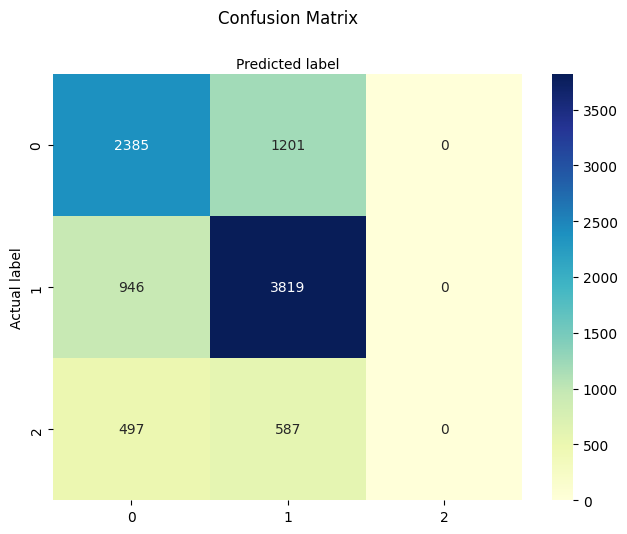

In [453]:
class_names = ['New', 'Standard', 'Old']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(ticks = tick_marks, labels = class_names)
plt.yticks(ticks = tick_marks, labels = class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('confusion_matrix_nd.png', dpi = 100, bbox_inches='tight');

#### Classification Report

In [454]:
target_names = ['New', 'Standard', 'Old']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         New       0.62      0.67      0.64      3586
    Standard       0.68      0.80      0.74      4765
         Old       0.00      0.00      0.00      1084

    accuracy                           0.66      9435
   macro avg       0.43      0.49      0.46      9435
weighted avg       0.58      0.66      0.62      9435



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Delay

In [455]:
dfu13 = dfutest[dfutest['DEP_DEL15'] == 1]

In [456]:
dfu13

,DEP_DEL15,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,PRCP,TMAX,AWND,PLANE_AGE_GROUP
0,1,36,168,0,10278,73508,0,35,10.96,2
13,1,36,180,0,10278,73508,0,35,10.96,0
18,1,29,124,0,10278,73508,0,35,10.96,1
22,1,21,234,0,10278,73508,0,35,10.96,1
29,1,30,176,1,10278,75506,0,35,10.96,1
...,...,...,...,...,...,...,...,...,...,...
45409,1,3,199,0,1191,73508,0,81,25.05,2
45412,1,5,173,3,1191,46218,0,81,6.71,0
45413,1,2,273,1,1191,75506,0,81,6.71,1
45415,1,4,173,3,1191,46218,0,81,6.71,0


In [457]:
df_X = dfu13.drop('PLANE_AGE_GROUP', axis = 1)

In [458]:
df_X

,DEP_DEL15,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,PRCP,TMAX,AWND
0,1,36,168,0,10278,73508,0,35,10.96
13,1,36,180,0,10278,73508,0,35,10.96
18,1,29,124,0,10278,73508,0,35,10.96
22,1,21,234,0,10278,73508,0,35,10.96
29,1,30,176,1,10278,75506,0,35,10.96
...,...,...,...,...,...,...,...,...,...
45409,1,3,199,0,1191,73508,0,81,25.05
45412,1,5,173,3,1191,46218,0,81,6.71
45413,1,2,273,1,1191,75506,0,81,6.71
45415,1,4,173,3,1191,46218,0,81,6.71


In [459]:
df_y = dfu13.PLANE_AGE_GROUP

In [460]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.25, random_state = 0)

#### Logistic Regression Model Evalaution via Confusion Matrix Method

In [461]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [462]:
lor = LogisticRegression(max_iter = 10000)
lor.fit(X_train, y_train)
y_pred = lor.predict(X_test)

#### Confusion matrix

In [463]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[384, 336,   0],
       [170, 810,   0],
       [120, 101,   0]])

#### Confusion Matrix Visualization

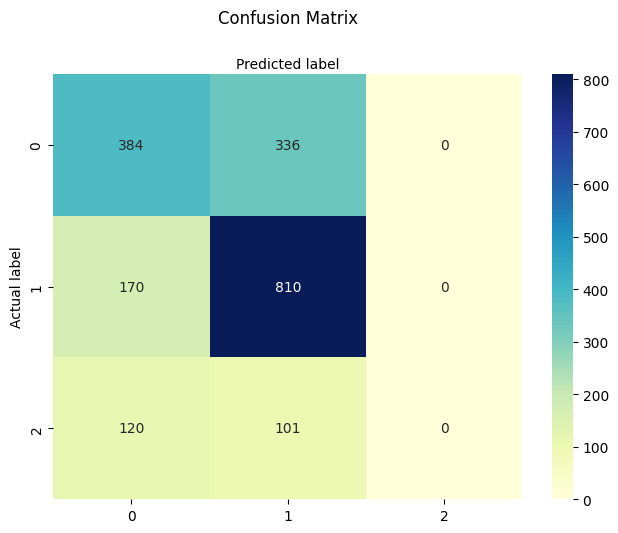

In [464]:
class_names = ['New', 'Standard', 'Old']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(ticks = tick_marks, labels = class_names)
plt.yticks(ticks = tick_marks, labels = class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('confusion_matrix_d.png', dpi = 100, bbox_inches='tight');

#### Classification Report

In [465]:
target_names = ['New', 'Standard', 'Old']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         New       0.57      0.53      0.55       720
    Standard       0.65      0.83      0.73       980
         Old       0.00      0.00      0.00       221

    accuracy                           0.62      1921
   macro avg       0.41      0.45      0.43      1921
weighted avg       0.54      0.62      0.58      1921



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
